In [19]:
import pandas as pd
titanic = pd.read_csv("train.csv")
titanic["Age"] =  titanic["Age"].replace(['?'], [None]).astype('float')


In [11]:
df = titanic[["Pclass","Survived","Sex","Age"]]
gbo = df.groupby("Sex") 
gbo.ngroups


2

In [12]:
gbo["Age"].mean()#max,min ect

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [13]:
titanic.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
titanic.groupby("Sex")["Pclass"].mean()

Sex
female    2.159236
male      2.389948
Name: Pclass, dtype: float64

In [16]:
#for the entire dataframe
titanic.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [25]:
#AGGREGATE WITH CUSTOM FUNCTIONS
def range(x):
        return  x.max()-x.min()
titanic.groupby("Pclass")["Age"].agg(range)

Pclass
1    79.08
2    69.33
3    73.58
Name: Age, dtype: float64

# MULTIINDEXING

In [26]:
import pandas as pd
titanic = pd.read_csv("train.csv")
titanic["Age"] =  titanic["Age"].replace(['?'], [None]).astype('float')
titanic["Fare"] =  titanic["Fare"].replace(['?'], [None]).astype('float')


In [29]:
s1 = titanic.groupby(["Pclass","Sex"])["Age"].mean()
s1

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [30]:
s1.index#but titanic.index is a range index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [33]:
df= titanic.groupby(["Pclass","Sex"]).mean()
df

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [37]:
titanic.loc[[6,7]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [55]:
charts =pd.read_csv("charts.csv")
#charts.index.get_level_values(0)#this will not work because it has to be a series
 

date            0         2021-11-06
                1         2021-11-06
                2         2021-11-06
                3         2021-11-06
                4         2021-11-06
                             ...    
weeks-on-board  330082             1
                330083             1
                330084             1
                330085             1
                330086             1
Length: 2310609, dtype: object

<AxesSubplot:xlabel='Pclass,Sex'>

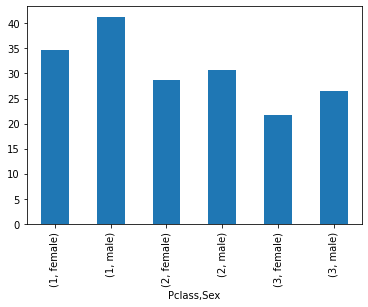

In [57]:
# USING STACK AND UNSTAK TO PLOT
titanic.groupby(["Pclass","Sex"])["Age"].mean().plot(kind="bar")

In [58]:
titanic.groupby(["Pclass","Sex"])["Age"].mean().unstack()

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


<AxesSubplot:xlabel='Pclass'>

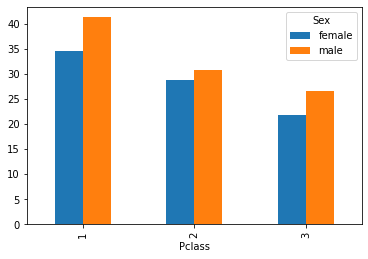

In [59]:
titanic.groupby(["Pclass","Sex"])["Age"].mean().unstack().plot(kind="bar")

In [60]:
 titanic.groupby(["Pclass","Sex"])["Age"].mean().unstack(level="Pclass")

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


<AxesSubplot:xlabel='Sex'>

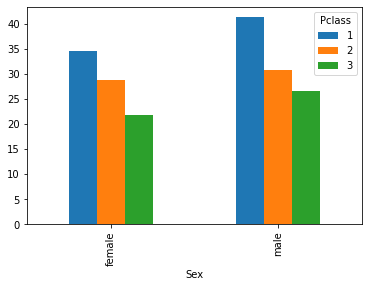

In [61]:
 titanic.groupby(["Pclass","Sex"])["Age"].mean().unstack(level="Pclass").plot(kind="bar")

In [62]:
titanic.groupby(["Sex","Survived"]).mean()

PassengerId    Pclass        Age     SibSp     Parch  \
Sex    Survived                                                         
female 0          434.851852  2.851852  25.046875  1.209877  1.037037   
       1          429.699571  1.918455  28.847716  0.515021  0.515021   
male   0          449.121795  2.476496  31.618056  0.440171  0.207265   
       1          475.724771  2.018349  27.276022  0.385321  0.357798   

                      Fare  
Sex    Survived             
female 0         23.024385  
       1         51.938573  
male   0         21.960993  
       1         40.821484

In [63]:
titanic.groupby(["Sex","Survived"])["Age"].mean().unstack()

Survived,0,1
Sex,,
female,25.046875,28.847716
male,31.618056,27.276022


<AxesSubplot:xlabel='Sex'>

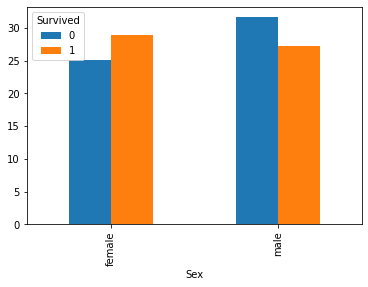

In [64]:
titanic.groupby(["Sex","Survived"])["Age"].mean().unstack().plot(kind="bar")

In [65]:
titanic.groupby(["Sex","Survived"])["Age"].mean().unstack().rename(columns={0:"Died",1: "Survived"})

Survived,Died,Survived
Sex,,
female,25.046875,28.847716
male,31.618056,27.276022
